In [1]:
import pandas as pd
import numpy as np
import seaborn as sns #visualisation
import matplotlib.pyplot as plt #visualisation
%matplotlib inline 
sns.set(color_codes=True)
from sklearn.impute import KNNImputer
import math
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA

from sklearn.model_selection import train_test_split
from matplotlib import pyplot
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

### This is a binary classification problem.

### The dataset’s  positive class (1) consists of component failures for a specific component of the APS system.

### The The dataset’s negative class (0) consists of trucks with failures for components not related to the APS.

### 1.	Develop strategies, incorporating basic programming skills (input / output and basic data structures) for identifying and handling missing and out-of-range data

### 2.	Programmatically implement graphical methods to identify issues within a data set (missing, out of range, dirty data)

### 3.	Perform a critical analysis of a data set to optimise the data for a given problem space. Document the rationale behind the decisions to peers and stakeholders.

In [2]:
df=pd.read_csv("aps_failure_set.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60000 entries, 0 to 59999
Columns: 171 entries, class to eg_000
dtypes: int64(1), object(170)
memory usage: 78.3+ MB


In [3]:
df.head(5)

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
0,neg,76698,na,2130706438,280,0,0,0,0,0,...,1240520,493384,721044,469792,339156,157956,73224,0,0,0
1,neg,33058,na,0,na,0,0,0,0,0,...,421400,178064,293306,245416,133654,81140,97576,1500,0,0
2,neg,41040,na,228,100,0,0,0,0,0,...,277378,159812,423992,409564,320746,158022,95128,514,0,0
3,neg,12,0,70,66,0,10,0,0,0,...,240,46,58,44,10,0,0,0,4,32
4,neg,60874,na,1368,458,0,0,0,0,0,...,622012,229790,405298,347188,286954,311560,433954,1218,0,0


In [4]:
df.tail(5) 

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
59995,neg,153002,na,664,186,0,0,0,0,0,...,998500,566884,1290398,1218244,1019768,717762,898642,28588,0,0
59996,neg,2286,na,2130706538,224,0,0,0,0,0,...,10578,6760,21126,68424,136,0,0,0,0,0
59997,neg,112,0,2130706432,18,0,0,0,0,0,...,792,386,452,144,146,2622,0,0,0,0
59998,neg,80292,na,2130706432,494,0,0,0,0,0,...,699352,222654,347378,225724,194440,165070,802280,388422,0,0
59999,neg,40222,na,698,628,0,0,0,0,0,...,440066,183200,344546,254068,225148,158304,170384,158,0,0


In [5]:
df.shape

(60000, 171)

In [6]:
df = df.drop_duplicates()
df.shape

(60000, 171)

In [7]:
df.count()

class     60000
aa_000    60000
ab_000    60000
ac_000    60000
ad_000    60000
          ...  
ee_007    60000
ee_008    60000
ee_009    60000
ef_000    60000
eg_000    60000
Length: 171, dtype: int64

In [8]:
df.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,60000,60000,60000,60000,60000,60000,60000,60000,...,60000,60000,60000,60000,60000,60000,60000,60000,60000,60000
unique,2,NaN,30,2062,1887,334,419,155,618,2423,...,34489,31712,35189,36289,31796,30470,24214,9725,29,50
top,neg,NaN,na,0,na,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
freq,59000,NaN,46329,8752,14861,55543,55476,59133,58587,56181,...,1364,1557,1797,2814,4458,7898,17280,31863,57021,56794
mean,NaN,5.933650e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,1.454301e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,8.340000e+02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,3.077600e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,4.866800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.dtypes

class     object
aa_000     int64
ab_000    object
ac_000    object
ad_000    object
           ...  
ee_007    object
ee_008    object
ee_009    object
ef_000    object
eg_000    object
Length: 171, dtype: object

In [10]:
unique_values = df.nunique()
unique_values

class         2
aa_000    22095
ab_000       30
ac_000     2062
ad_000     1887
          ...  
ee_007    30470
ee_008    24214
ee_009     9725
ef_000       29
eg_000       50
Length: 171, dtype: int64

In [11]:
string_columns = df.select_dtypes(include=['object'])

# Loop through the selected string columns and print unique values
for column in string_columns:
    unique_values = df[column].unique()
    print(f"Unique values in column '{column}': {unique_values}")

Unique values in column 'class': ['neg' 'pos']
Unique values in column 'ab_000': ['na' '0' '2' '4' '6' '8' '18' '10' '12' '16' '204' '24' '134' '90' '26'
 '14' '34' '52' '20' '22' '30' '36' '100' '48' '58' '32' '28' '44' '46'
 '68']
Unique values in column 'ac_000': ['2130706438' '0' '228' ... '8974' '123514' '2602']
Unique values in column 'ad_000': ['280' 'na' '100' ... '5286' '3608' '194868']
Unique values in column 'ae_000': ['0' '16' '104' 'na' '2' '222' '4' '290' '1286' '170' '6' '806' '1464'
 '274' '18' '8' '342' '64' '34' '192' '144' '176' '1512' '120' '58' '114'
 '460' '12' '112' '1314' '20' '550' '36' '1424' '180' '324' '204' '254'
 '106' '154' '92' '256' '202' '352' '26' '124' '2240' '466' '778' '28'
 '100' '14' '276' '42' '82' '22' '384' '282' '386' '98' '164' '108' '86'
 '38' '266' '1056' '134' '10' '200' '150' '326' '350' '398' '424' '32'
 '128' '752' '314' '732' '2312' '400' '158' '668' '30' '212' '224' '950'
 '4726' '60' '226' '388' '640' '258' '62' '206' '44' '414' '45

Unique values in column 'az_003': ['12348' '13086' '34250' ... '82224' '18848' '219406']
Unique values in column 'az_004': ['615248' '1010074' '1811606' ... '60160' '940376' '2115972']
Unique values in column 'az_005': ['5526276' '1873902' '710672' ... '134204' '4970242' '527578']
Unique values in column 'az_006': ['2378' '14726' '34' ... '66520' '42146' '43278']
Unique values in column 'az_007': ['4' '6' '0' ... '2888' '104482' '304440']
Unique values in column 'az_008': ['0' '4' '8' ... '10996' '3292' '11916']
Unique values in column 'az_009': ['0' '2' '4' 'na' '28' '952' '10' '666148' '1532' '18' '26' '1118' '320'
 '14' '24' '20' '914' '44' '34' '1056' '6' '3612' '72' '2084' '1290' '8'
 '40' '256294' '1174' '1442' '1098' '36' '82' '42' '1130' '1002' '25174'
 '1372' '1036' '2064' '370' '114' '1448' '16' '22' '312' '1466' '5654'
 '1332' '12' '86' '1148' '54' '1254' '62' '38' '1670' '146' '2802' '1178'
 '3796' '1200' '1194' '1894' '70' '996' '68' '1092' '30' '5050' '252' '64'
 '1494' '

Unique values in column 'cs_006': ['895240' '301242' '488302' ... '75776' '1312814' '233308']
Unique values in column 'cs_007': ['26330' '9148' '16682' ... '38298' '24104' '36428']
Unique values in column 'cs_008': ['118' '22' '246' '0' '204' '86' '352' '170' '96' '342' '384' '2' '104'
 '40' '50' '280' '168' '16' '234' '14' '68' '188' '48' '940' '4' '78'
 '1056' '24' '32' '80' '76' '20' '214' '26' '164' '44' '190' 'na' '30'
 '296' '150' '132' '176' '370' '918' '294' '88' '552' '320' '130' '52'
 '182' '90' '6' '178' '192' '138' '134' '72' '56' '156' '472' '70' '58'
 '8' '46' '186' '232' '218' '184' '722' '212' '84' '286' '572' '98' '140'
 '146' '148' '64' '34' '128' '18' '162' '10' '12' '554' '42' '336' '38'
 '82' '74' '120' '94' '114' '270' '328' '92' '312' '362' '60' '412' '356'
 '152' '332' '282' '110' '428' '112' '36' '122' '144' '530' '338' '54'
 '28' '102' '62' '142' '108' '434' '226' '3034' '154' '406' '594' '860'
 '240' '220' '166' '422' '208' '576' '634' '252' '126' '198' '372'

Unique values in column 'ee_005': ['469792' '245416' '409564' ... '1218244' '68424' '254068']
Unique values in column 'ee_006': ['339156' '133654' '320746' ... '1019768' '194440' '225148']
Unique values in column 'ee_007': ['157956' '81140' '158022' ... '157636' '717762' '158304']
Unique values in column 'ee_008': ['73224' '97576' '95128' ... '898642' '802280' '170384']
Unique values in column 'ee_009': ['0' '1500' '514' ... '33338' '28588' '388422']
Unique values in column 'ef_000': ['0' '4' 'na' '2' '8' '6' '84' '22' '134' '26' '10' '350' '320' '40' '30'
 '20' '482' '166' '12' '276' '252' '18' '82' '14' '236' '144' '86' '362'
 '74']
Unique values in column 'eg_000': ['0' '32' 'na' '164' '54' '4' '2' '10' '6' '14' '12' '8' '144' '68' '86'
 '26' '20' '28' '16' '34' '94' '222' '36' '892' '48' '72' '152' '78' '910'
 '70' '172' '46' '80' '182' '24' '56' '102' '430' '42' '18' '162' '40'
 '200' '1146' '44' '108' '92' '22' '606' '416']


In [12]:
df2 = df.replace(['na'],[np.NaN])
df2.describe()

,aa_000
count,6.000000e+04
mean,5.933650e+04
std,1.454301e+05
min,0.000000e+00
25%,8.340000e+02
50%,3.077600e+04
75%,4.866800e+04
max,2.746564e+06


In [13]:
columns_changing = df2.columns[1:]

#Change the data type of the selected columns
df2[columns_changing] = df2[columns_changing].astype('float')

In [14]:
column_dtypes = df2.dtypes

# Print the data types
print(column_dtypes)

class      object
aa_000    float64
ab_000    float64
ac_000    float64
ad_000    float64
           ...   
ee_007    float64
ee_008    float64
ee_009    float64
ef_000    float64
eg_000    float64
Length: 171, dtype: object


In [15]:
df2.describe(include='all')

,class,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,neg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,59000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,NaN,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,NaN,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,NaN,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,NaN,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,NaN,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000


In [16]:
df3=df2.rename(columns={"class": "classification"})
df3.columns

Index(['classification', 'aa_000', 'ab_000', 'ac_000', 'ad_000', 'ae_000',
       'af_000', 'ag_000', 'ag_001', 'ag_002',
       ...
       'ee_002', 'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008',
       'ee_009', 'ef_000', 'eg_000'],
      dtype='object', length=171)

In [17]:
df3['classification'].value_counts()

neg    59000
pos     1000
Name: classification, dtype: int64

In [18]:
df3['classification'] = df3.classification.map({'neg':0, 'pos':1})

In [19]:
df3['classification'].value_counts()

0    59000
1     1000
Name: classification, dtype: int64

In [20]:
df3.describe(include='all')

,classification,aa_000,ab_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,13671.000000,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,0.713189,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,3.478962,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,0.000000,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,0.000000,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,0.000000,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,204.000000,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


### Step 1

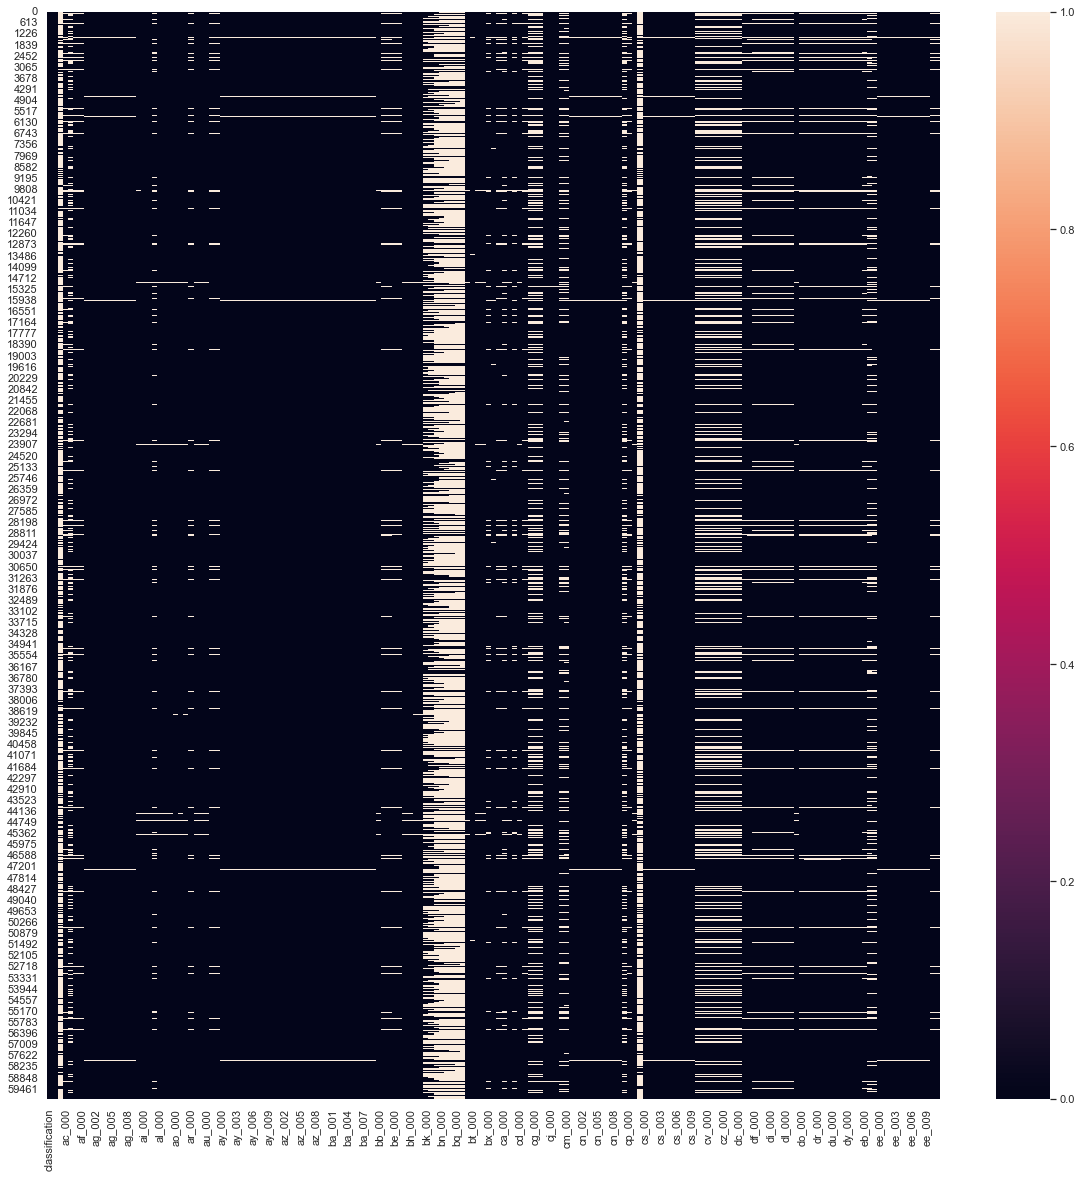

In [21]:
sns.set(rc={'figure.figsize':(20,20)})
plot = sns.heatmap(df3.isnull())
plt.show(plot)

<AxesSubplot:>

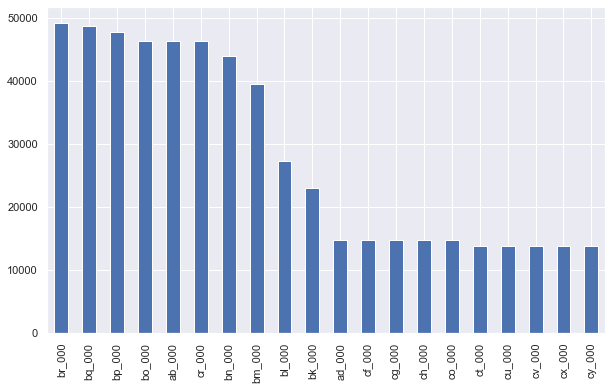

In [22]:
df3.isnull().sum().nlargest(20).plot(kind='bar', figsize=(10, 6))

In [23]:
df3.isnull().any()

classification    False
aa_000            False
ab_000             True
ac_000             True
ad_000             True
                  ...  
ee_007             True
ee_008             True
ee_009             True
ef_000             True
eg_000             True
Length: 171, dtype: bool

In [24]:
df3.isnull().any().value_counts()

True     169
False      2
dtype: int64

In [25]:
df3.isnull().sum()

classification        0
aa_000                0
ab_000            46329
ac_000             3335
ad_000            14861
                  ...  
ee_007              671
ee_008              671
ee_009              671
ef_000             2724
eg_000             2723
Length: 171, dtype: int64

In [26]:
# Columns where missing values are more than 70% -> 60000x0.7=42000
# Dropping all the columns where the number of missing values are more than 42K

In [27]:
df3.isnull().sum().nlargest(10)

br_000    49264
bq_000    48722
bp_000    47740
bo_000    46333
ab_000    46329
cr_000    46329
bn_000    44009
bm_000    39549
bl_000    27277
bk_000    23034
dtype: int64

### Columns where missing values are more than 70% -> 60000x0.7=42000

In [28]:
#df5=df3.dropna(axis = 1, thresh=42000,inplace= True)
df4 = df3.dropna(axis=1, thresh=(len(df3) - 42000))

In [29]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 164 entries, classification to eg_000
dtypes: float64(163), int64(1)
memory usage: 75.5 MB


In [30]:
df4.describe()

,classification,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,...,ee_002,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000
count,60000.000000,6.000000e+04,5.666500e+04,4.513900e+04,57500.000000,57500.000000,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,...,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,5.932900e+04,57276.000000,57277.000000
mean,0.016667,5.933650e+04,3.560143e+08,1.906206e+05,6.819130,11.006817,2.216364e+02,9.757223e+02,8.606015e+03,8.859128e+04,...,4.454897e+05,2.111264e+05,4.457343e+05,3.939462e+05,3.330582e+05,3.462714e+05,1.387300e+05,8.388915e+03,0.090579,0.212756
std,0.128020,1.454301e+05,7.948749e+08,4.040441e+07,161.543373,209.792592,2.047846e+04,3.420053e+04,1.503220e+05,7.617312e+05,...,1.155540e+06,5.433188e+05,1.168314e+06,1.121044e+06,1.069160e+06,1.728056e+06,4.495100e+05,4.747043e+04,4.368855,8.830641
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,0.000000,8.340000e+02,1.600000e+01,2.400000e+01,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.936000e+03,1.166000e+03,2.700000e+03,3.584000e+03,5.120000e+02,1.100000e+02,0.000000e+00,0.000000e+00,0.000000,0.000000
50%,0.000000,3.077600e+04,1.520000e+02,1.260000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.337960e+05,1.120860e+05,2.215180e+05,1.899880e+05,9.243200e+04,4.109800e+04,3.812000e+03,0.000000e+00,0.000000,0.000000
75%,0.000000,4.866800e+04,9.640000e+02,4.300000e+02,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,4.383960e+05,2.182320e+05,4.666140e+05,4.032220e+05,2.750940e+05,1.678140e+05,1.397240e+05,2.028000e+03,0.000000,0.000000
max,1.000000,2.746564e+06,2.130707e+09,8.584298e+09,21050.000000,20070.000000,3.376892e+06,4.109372e+06,1.055286e+07,6.340207e+07,...,7.793393e+07,3.775839e+07,9.715238e+07,5.743524e+07,3.160781e+07,1.195801e+08,1.926740e+07,3.810078e+06,482.000000,1146.000000


In [31]:
df3.shape

(60000, 171)

In [32]:
df4.shape

(60000, 164)

In [33]:
df4.isnull().sum().nlargest(10)

bm_000    39549
bl_000    27277
bk_000    23034
ad_000    14861
cf_000    14861
cg_000    14861
ch_000    14861
co_000    14861
ct_000    13808
cu_000    13808
dtype: int64

### Step 2

In [34]:
df5 = df4.select_dtypes(include=['float64'])
medians = df4.median()
#df4=df4.fillna(medians, inplace=True)
df5=df5.fillna(medians)

In [35]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 163 entries, aa_000 to eg_000
dtypes: float64(163)
memory usage: 75.1 MB


In [36]:
df5['classification']=df3['classification']

In [37]:
df5.columns

Index(['aa_000', 'ac_000', 'ad_000', 'ae_000', 'af_000', 'ag_000', 'ag_001',
       'ag_002', 'ag_003', 'ag_004',
       ...
       'ee_003', 'ee_004', 'ee_005', 'ee_006', 'ee_007', 'ee_008', 'ee_009',
       'ef_000', 'eg_000', 'classification'],
      dtype='object', length=164)

In [38]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60000 entries, 0 to 59999
Columns: 164 entries, aa_000 to classification
dtypes: float64(163), int64(1)
memory usage: 75.5 MB


In [39]:
print("Percentage of Scania trucks with failures for components not related to the APS \n", (df5[df5['classification']== 0].shape[0] / df5.shape[0]) * 100)
print("Percentage of Scania trucks with failures for components related to the APS \n", (df5[df5['classification']== 1].shape[0] / df5.shape[0]) * 100)

Percentage of Scania trucks with failures for components not related to the APS 
 98.33333333333333
Percentage of Scania trucks with failures for components related to the APS 
 1.6666666666666667


### Performing a critical analysis to optimise the database

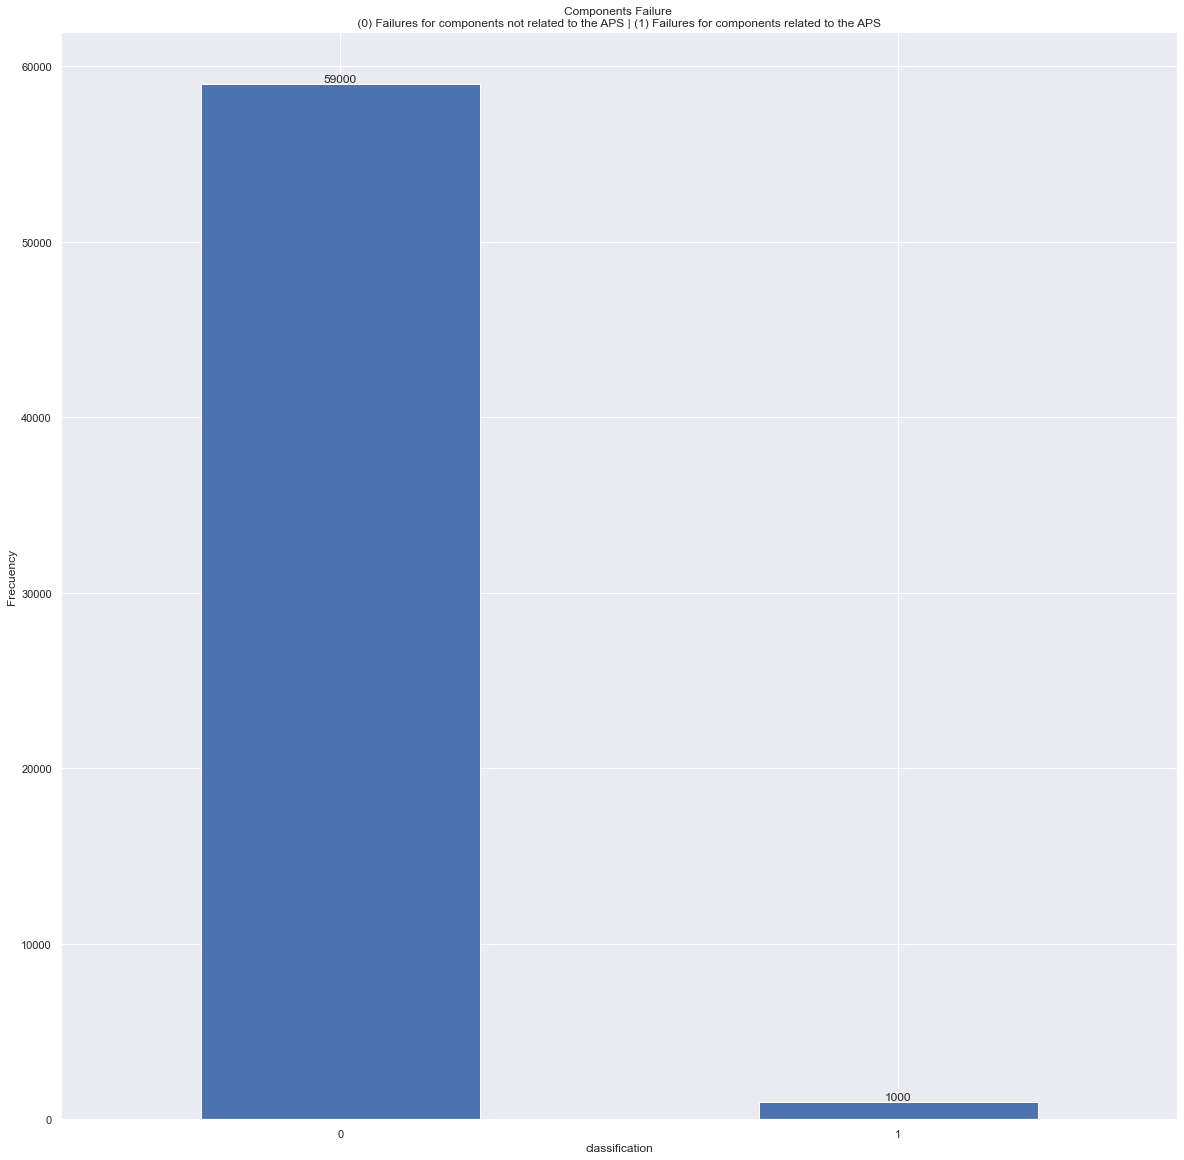

In [40]:
Count = pd.value_counts(df5['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS | (1) Failures for components related to the APS ")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

In [41]:
#outliers

Q1 = df5.quantile(0.25)
Q3 = df5.quantile(0.75)
IQR = Q3-Q1
print(IQR)

aa_000             47834.0
ac_000               828.0
ad_000               250.0
ae_000                 0.0
af_000                 0.0
                    ...   
ee_008            136725.5
ee_009              1934.0
ef_000                 0.0
eg_000                 0.0
classification         0.0
Length: 164, dtype: float64


In [42]:
df5_no_label = df5.drop(df5["classification"])

In [43]:
df5_no_label = df5_no_label[~((df5_no_label < (Q1-1.5 * IQR)) |(df5_no_label > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
df5_no_label["classification"] = df5["classification"]
df_outliers=df5_no_label
df_outliers.describe

<bound method NDFrame.describe of         aa_000  ac_000  ad_000  ae_000  af_000  ag_000  ag_001  ag_002  \
47        18.0   124.0   126.0     0.0     0.0     0.0     0.0     0.0   
56     24836.0   152.0   126.0     0.0     0.0     0.0     0.0     0.0   
88       812.0    44.0    34.0     0.0     0.0     0.0     0.0     0.0   
165     1800.0   370.0   346.0     0.0     0.0     0.0     0.0     0.0   
168     2750.0    74.0    68.0     0.0     0.0     0.0     0.0     0.0   
...        ...     ...     ...     ...     ...     ...     ...     ...   
59899     26.0    26.0    14.0     0.0     0.0     0.0     0.0     0.0   
59901   1578.0   166.0   154.0     0.0     0.0     0.0     0.0     0.0   
59918   1266.0    86.0    76.0     0.0     0.0     0.0     0.0     0.0   
59981     16.0    20.0    20.0     0.0     0.0     0.0     0.0     0.0   
59994     32.0     0.0   126.0     0.0     0.0     0.0     0.0     0.0   

       ag_003  ag_004  ...    ee_003    ee_004    ee_005   ee_006   ee_007  \

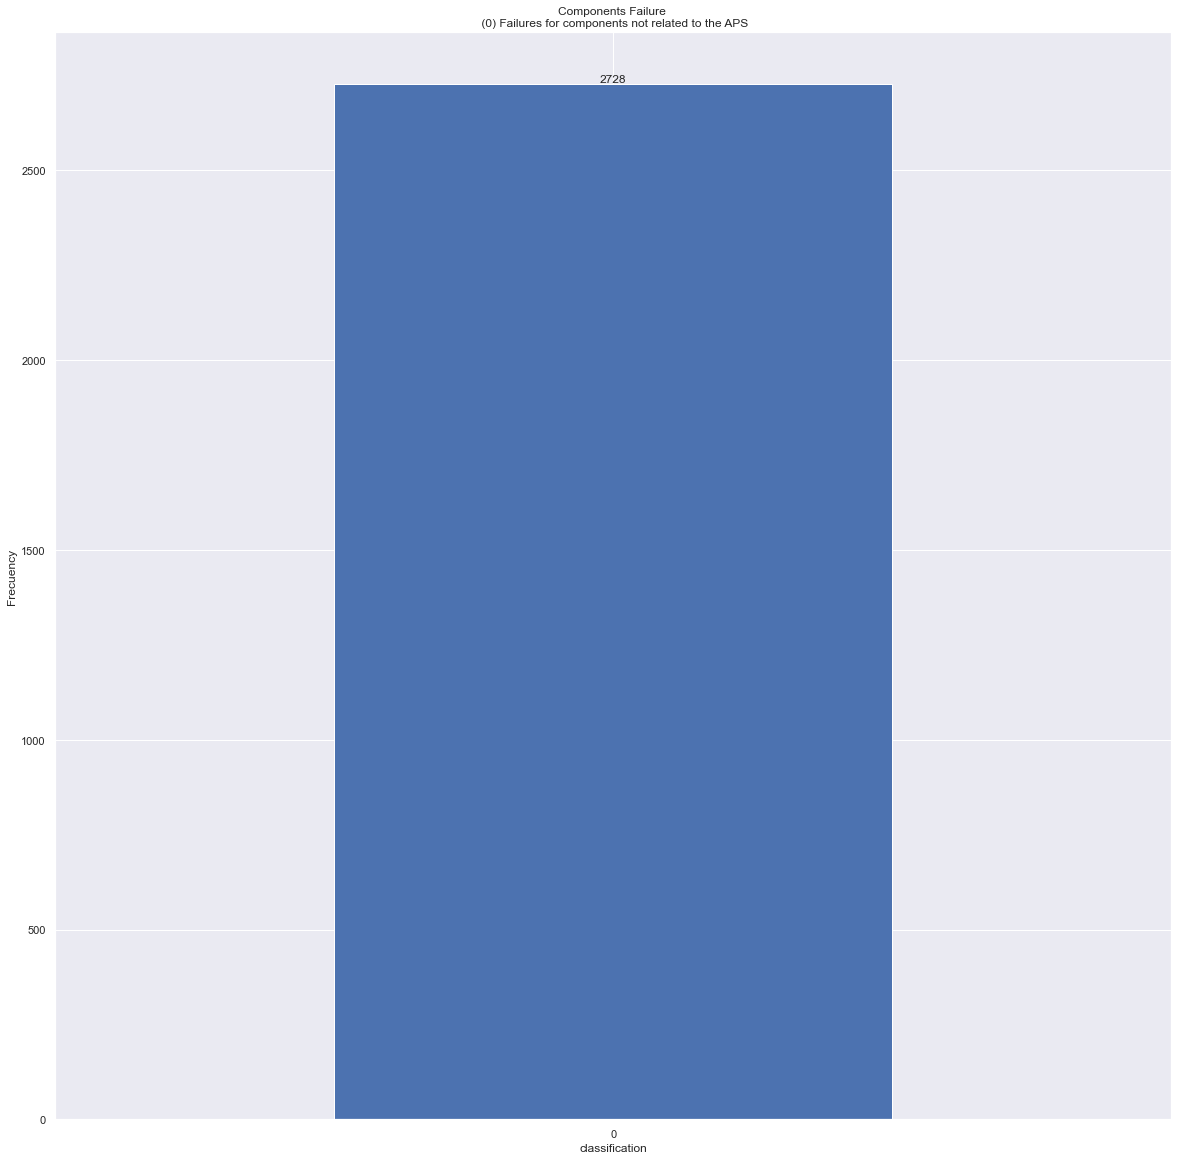

In [45]:
Count = pd.value_counts(df_outliers['classification'], sort = True).sort_index()
Count.plot(kind = 'bar')
plt.title("Components Failure \n (0) Failures for components not related to the APS")
plt.xlabel("classification")
plt.ylabel("Frecuency")

for index, value in enumerate(Count):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xticks(rotation=360)
plt.show()

In [46]:
scaler = MinMaxScaler()

# Fit and transform the numerical data
df5[df5.columns] = scaler.fit_transform(df5)

In [47]:
df5.head()

,aa_000,ac_000,ad_000,ae_000,af_000,ag_000,ag_001,ag_002,ag_003,ag_004,...,ee_003,ee_004,ee_005,ee_006,ee_007,ee_008,ee_009,ef_000,eg_000,classification
0,0.027925,9.999998e-01,3.261769e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000163,...,0.013067,7.421784e-03,8.179508e-03,1.073013e-02,0.001321,0.003800,0.000000,0.000000,0.000000,0.0
1,0.012036,0.000000e+00,1.467796e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000080,...,0.004716,3.019031e-03,4.272917e-03,4.228511e-03,0.000679,0.005064,0.000394,0.000000,0.000000,0.0
2,0.014942,1.070067e-07,1.164918e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000007,...,0.004232,4.364196e-03,7.130884e-03,1.014768e-02,0.001321,0.004937,0.000135,0.000000,0.000000,0.0
3,0.000004,3.285295e-08,7.688457e-09,0.0,0.000498,0.0,0.0,0.0,0.000005,0.000010,...,0.000001,5.970003e-07,7.660803e-07,3.163775e-07,0.000000,0.000000,0.000000,0.008299,0.027923,0.0
4,0.022164,6.420405e-07,5.335323e-08,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000191,...,0.006086,4.171776e-03,6.044861e-03,9.078578e-03,0.002605,0.022523,0.000320,0.000000,0.000000,0.0


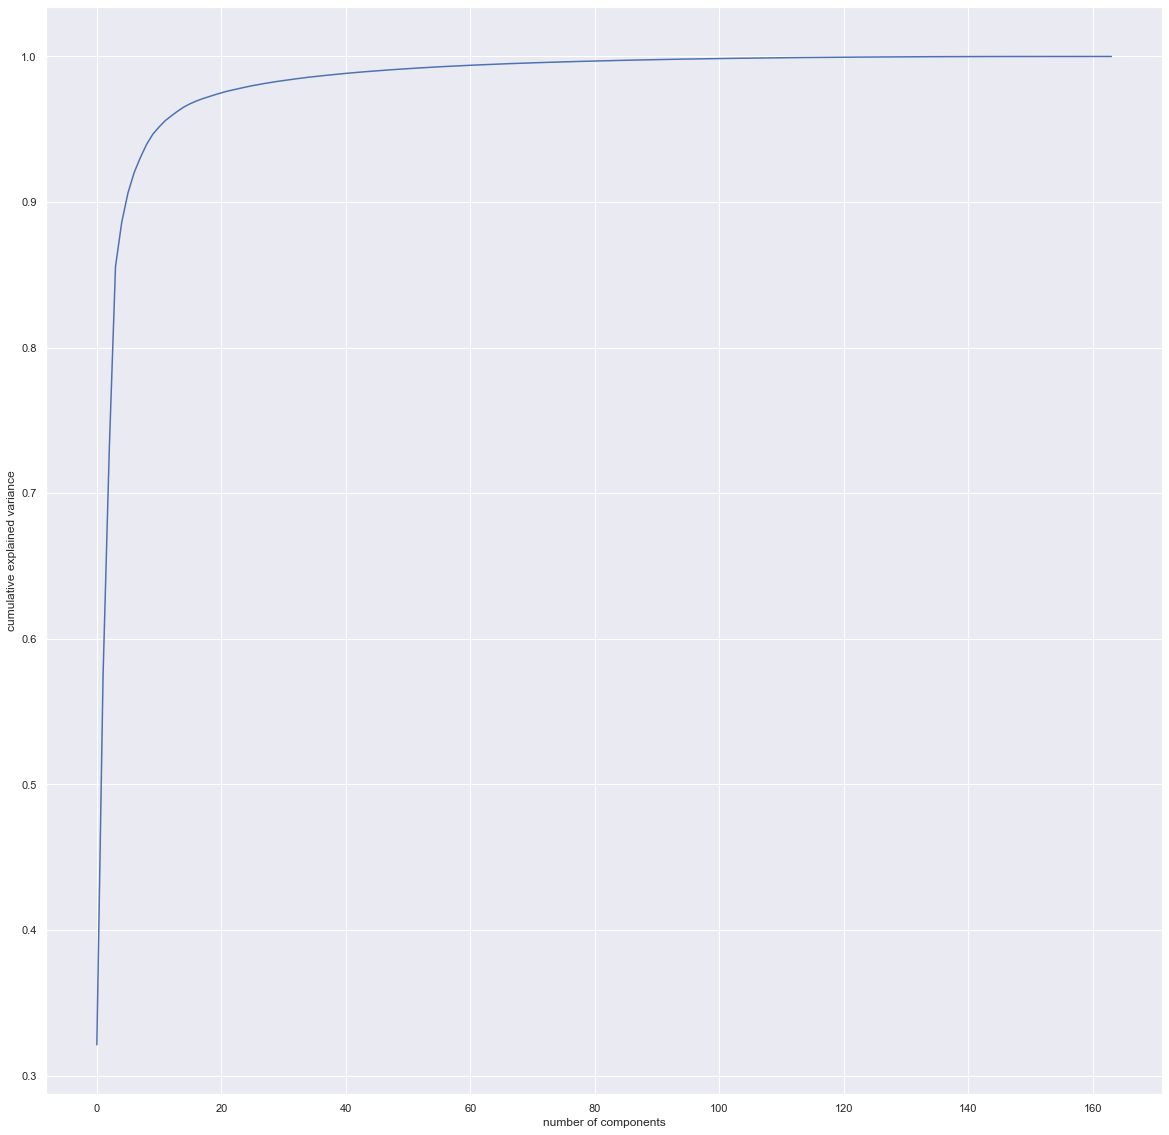

In [70]:
df5_no_label = df5.drop(df5["classification"])
pca = PCA().fit(df5_no_label) 
plt.plot(np.cumsum(pca.explained_variance_ratio_)) 
plt.xlabel('number of components') 
plt.ylabel('cumulative explained variance'); 

In [71]:
pca = PCA(80)
projected = pca.fit_transform(df5_no_label) 

In [72]:
projected.shape

(59998, 80)

In [73]:
df5_pca= pd.DataFrame(projected)

df5_pca["classification"] = df5["classification"]

In [74]:
df5_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,classification
0,-0.205345,-0.097024,-0.171187,-0.009731,0.004589,0.009938,-0.043641,-0.001436,-0.008821,0.002897,...,-0.000709,0.000014,-0.001923,-0.000155,0.000573,0.000483,-0.000232,-0.000287,0.000581,0.0
1,-0.468957,-0.076199,-0.104651,-0.032482,-0.001288,-0.010585,-0.008503,0.003157,0.007950,-0.001685,...,-0.000049,0.000552,-0.003278,-0.007135,-0.005269,-0.004962,-0.003577,0.000899,-0.002340,0.0
2,0.271882,-0.186908,-0.023089,-0.064689,-0.018570,0.007944,0.059597,-0.008647,-0.022495,-0.010026,...,0.000513,-0.002508,0.003432,-0.001504,0.001551,-0.000656,-0.002709,-0.001551,0.005874,0.0
3,0.011139,0.841942,0.111004,0.067454,-0.012402,0.006684,-0.025481,-0.004101,-0.015090,-0.009224,...,0.000079,-0.000683,-0.003776,0.002543,-0.001881,-0.001225,-0.001928,-0.000908,0.001176,0.0
4,-0.476466,-0.075402,-0.104754,-0.029392,0.001251,-0.008646,-0.009290,-0.002634,0.005979,0.005870,...,0.000708,-0.001190,0.000321,-0.000010,0.000084,0.000550,0.000534,-0.000691,0.000420,0.0


,0,1,2,3,4,5,6,7,8,9,...,71,72,73,74,75,76,77,78,79,classification
0,1.000000e+00,5.410545e-16,-6.286365e-17,5.816622e-17,-8.831795e-19,-4.746306e-17,3.271757e-19,1.842413e-17,1.634587e-17,3.340600e-17,...,-5.331502e-18,2.226084e-17,2.452700e-17,3.487667e-17,-8.154724e-18,-9.585009e-18,-4.304245e-18,-3.019522e-17,3.259459e-17,0.005815
1,5.410545e-16,1.000000e+00,1.526463e-17,6.258634e-18,-2.969228e-17,-7.443016e-18,-8.278269e-18,8.785664e-18,-1.854650e-17,6.096188e-18,...,1.966698e-18,-7.804976e-18,-9.724360e-18,2.051712e-17,-3.052494e-18,-1.602804e-17,6.577297e-18,-9.525919e-18,-3.068474e-17,-0.000717
2,-6.286365e-17,1.526463e-17,1.000000e+00,-2.375387e-17,2.013156e-17,1.291450e-17,2.293516e-17,-4.016233e-18,2.677402e-18,-1.441109e-17,...,2.108024e-18,7.272335e-18,-2.820962e-17,1.484712e-17,-1.219410e-17,-5.278306e-17,8.618373e-18,-4.258486e-18,3.100473e-17,0.000295
3,5.816622e-17,6.258634e-18,-2.375387e-17,1.000000e+00,4.955883e-17,9.401153e-17,-1.121188e-17,-1.327962e-18,1.561178e-17,-1.430422e-16,...,1.490692e-16,4.996885e-17,1.723301e-17,-7.595693e-17,4.396431e-17,2.565417e-16,2.078242e-17,-1.521523e-16,1.794530e-17,-0.001344
4,-8.831795e-19,-2.969228e-17,2.013156e-17,4.955883e-17,1.000000e+00,-5.845312e-16,-9.868113e-16,-2.472806e-16,-1.436039e-16,-9.696660e-17,...,-3.638583e-17,-2.049469e-18,-2.292916e-17,1.745844e-17,7.912842e-19,-6.872007e-17,6.978333e-17,-2.234202e-17,8.783383e-18,0.002979
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76,-9.585009e-18,-1.602804e-17,-5.278306e-17,2.565417e-16,-6.872007e-17,2.481352e-16,1.630699e-17,4.455230e-17,2.037781e-16,-4.588817e-17,...,-8.180280e-16,-3.600495e-17,-6.259797e-18,-8.666293e-17,2.254592e-16,1.000000e+00,-3.865947e-17,3.655413e-16,-2.091275e-16,0.001007
77,-4.304245e-18,6.577297e-18,8.618373e-18,2.078242e-17,6.978333e-17,-3.234998e-17,1.597579e-17,4.114622e-17,-7.381233e-18,-2.907861e-17,...,-6.644319e-16,3.796535e-16,1.848228e-16,-1.260213e-16,1.360854e-16,-3.865947e-17,1.000000e+00,-2.943162e-16,-1.028570e-16,0.008872
78,-3.019522e-17,-9.525919e-18,-4.258486e-18,-1.521523e-16,-2.234202e-17,-6.136247e-17,6.270122e-18,-8.016426e-17,-5.404875e-17,-6.867237e-18,...,1.069381e-15,-6.250982e-16,1.556684e-16,-4.232471e-16,5.272530e-16,3.655413e-16,-2.943162e-16,1.000000e+00,6.269743e-16,0.003325
79,3.259459e-17,-3.068474e-17,3.100473e-17,1.794530e-17,8.783383e-18,3.907681e-18,1.873061e-18,1.360871e-16,1.089443e-16,-3.029384e-17,...,7.716546e-17,7.761848e-16,3.250342e-18,9.899964e-17,-1.251971e-16,-2.091275e-16,-1.028570e-16,6.269743e-16,1.000000e+00,0.000613


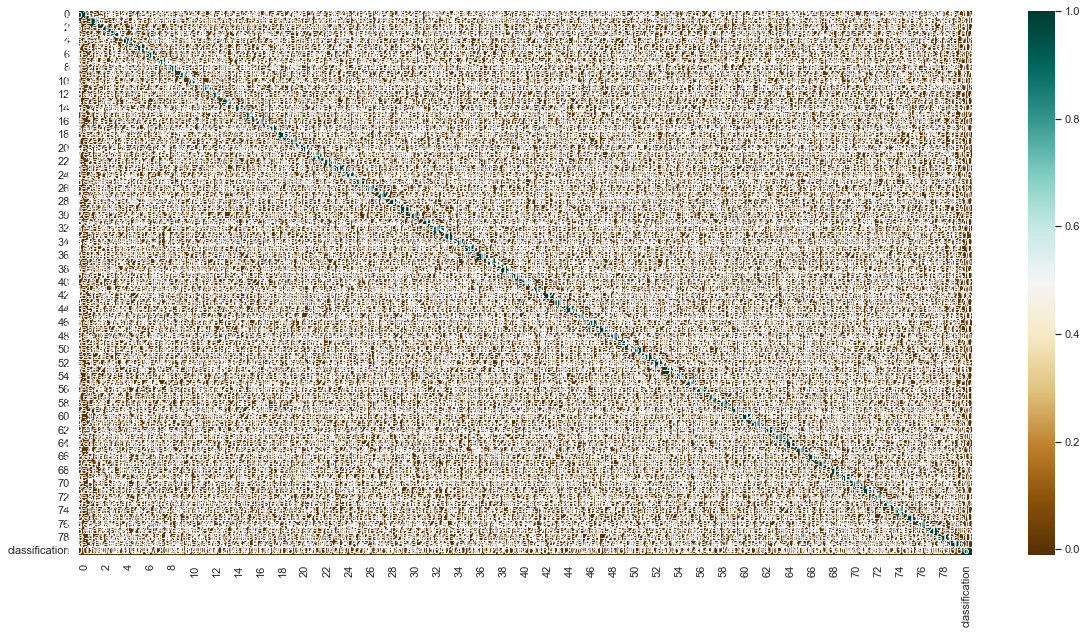

In [75]:
plt.figure(figsize=(20,10))
c= df5_pca.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [76]:
df5_array = df5_pca.values

In [77]:
X = df5_array[:,0:50]
y = df5_array[:,50]
X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)

In [78]:
models = []
models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

In [79]:
results = []
names = []
for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.

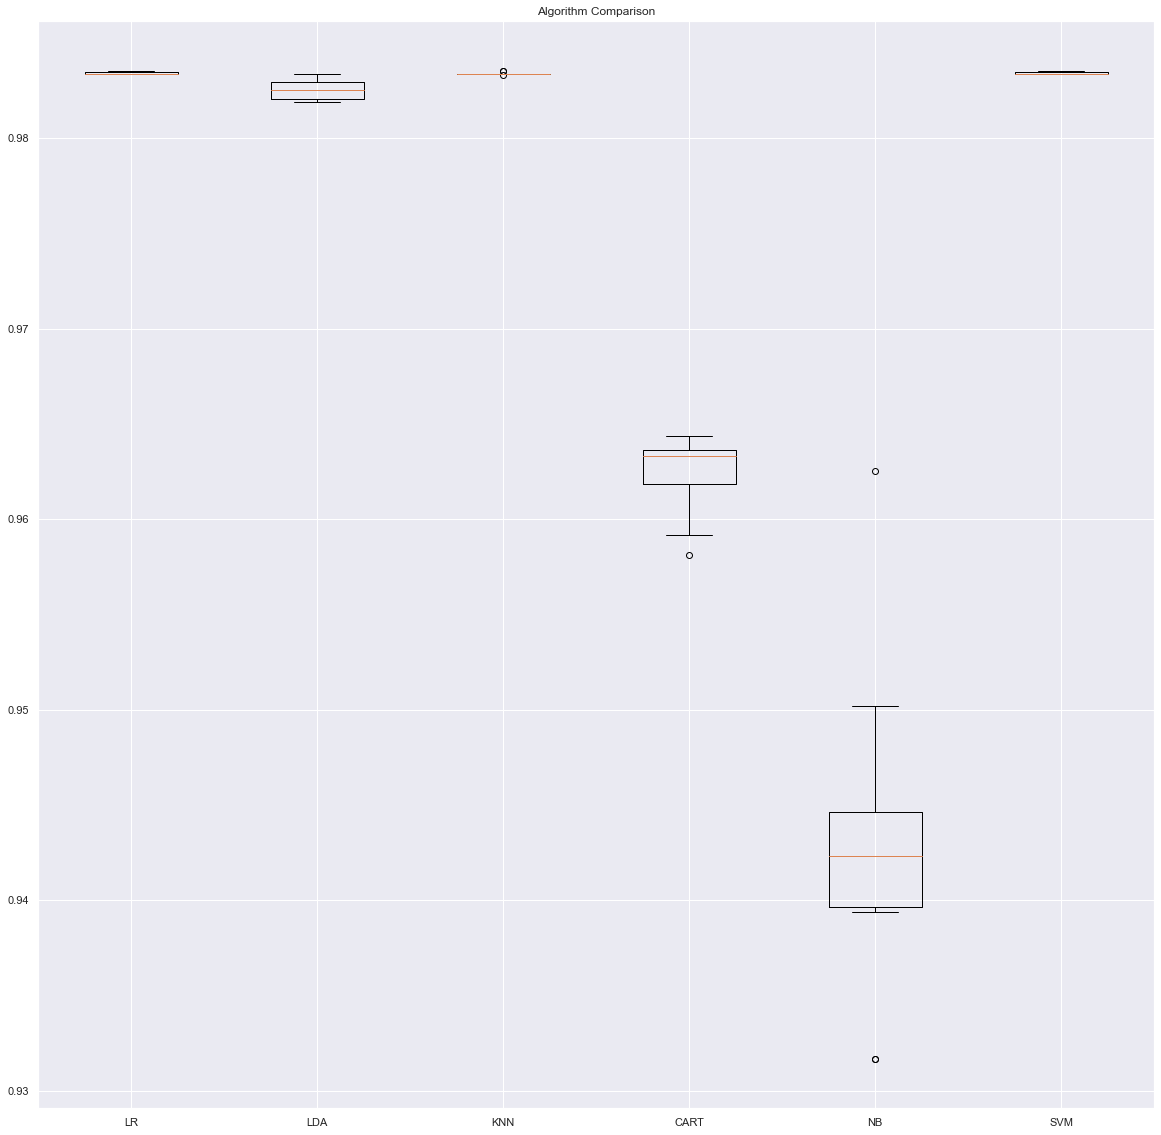

In [61]:
pyplot.boxplot(results, labels=names)
pyplot.title('Algorithm Comparison')
pyplot.show()

In [62]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [63]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9830833333333333
[[11797     0]
 [  203     0]]


In [64]:
model = LinearDiscriminantAnalysis()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)

In [65]:
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

0.9825
[[11790     7]
 [  203     0]]


## Minimum Requirements

### Characterisation of the data set: size; number of attributes; has/does not have missing values, number of observations etc. and what these Characterisation mean. 

### Application of Data preparation/evaluation methods (Cleaning, renaming, etc) and EDA visualizations (plural), including a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it.

### Use PCA to establish the minimum number of features needed for retaining 99.5% variance in the data and then implement PCA to dimensionally reduce the data to the number of features that you have discovered. Include a clear and concise explanation of your rationale for what you are doing with the data and why you are doing it. 

### Explain in your own words what the “Curse of Dimensionality ” is and how it may affect your analysis going forward.  

### References

### https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html

### https://seaborn.pydata.org/generated/seaborn.heatmap.html

### https://www.statology.org/pandas-unique-values-in-column/

### https://github.com/mrunal46/APS-Failure-at-Scania-Trucks/blob/master/APS%20failure.ipynb

### https://medium.com/analytics-vidhya/aps-failure-at-scania-trucks-data-set-1eb97b12812

### https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dtypes.html

### https://www.statology.org/pandas-unique-values-in-column/

### https://stackoverflow.com/questions/11568897/value-of-k-in-k-nearest-neighbor-algorithm

### https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/

### https://scikit-learn.org/stable/modules/cross_validation.html

### https://towardsdatascience.com/missing-value-imputation-with-python-and-k-nearest-neighbors-308e7abd273d

### https://kegui.medium.com/what-is-the-difference-between-nan-none-pd-nan-and-np-nan-a8ee0532e2eb#:~:text=np.-,nan%20is%20not%20comparable%20to%20np.,directly.&text=yes%2C%20if%20a%20data%20is,to%20use%20NaN%20%3D%3Dnp.

### https://pandas.pydata.org/pandas-docs/version/0.21/generated/pandas.DataFrame.dropna.html